# **Project :  CreditCard-Fraud-Detection**

### **Problem Statement:**

Company ABC, a major credit card company, faces challenges with their existing fraud detection system. The current system exhibits slow responsiveness in recognizing new patterns of fraud, leading to significant financial losses.


To address this issue, they have contracted us to design and implement an algorithm that can efficiently identify and flag potentially fraudulent transactions for further investigation.


The data provided consists of two tables:
* **"cc_info" :** containing general credit card and cardholder information;
* **"transactions" :** containing details of credit card transactions that occurred between August 1st and October 30th.

### **Objective:**

The **primary goal of this project is to build an advanced fraud detection system using neural networks to identify transactions that appear unusual and potentially fraudulent**. To be more specific, to develop a scalable solution that can handle large volumes of data and provide valuable insights to Company ABC.

## **Import somes packages**

In [1]:
import folium  # Library for creating interactive maps
from folium.plugins import HeatMap
import matplotlib.pyplot as plt  # Data visualization
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # Data visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping  # Callback to stop training when a monitored metric has stopped improving

## **I -  Data Loading and basic inspection**

---

In [2]:
df1 = pd.read_csv("/content/transactions.csv") # For transactions
df2 = pd.read_csv("/content/cc_info.csv") # For cc_info

Overview of the first 10 lines of our two datasets:

In [3]:
df1.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ MB


In [5]:
df1

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162


In [6]:
df2.head(10)

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
5,1997929794676601,Atlanta,NY,14808,21000
6,5449610971108305,Pittsburgh,PA,15201,6000
7,7482288151831611,Birmingham,NJ,8011,4000
8,8137811493121777,Washington,NH,3280,15000
9,7804216189681274,Los Angeles,CA,90001,20000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


The link between the two datasets is the **"credit_card"** column which exists on both sides.

## **II - Data Preprocessing**

---

### **1. Data Cleaning**

Now check for duplicates and missing values in both datasets.

In [8]:
# Count duplicates in the DataFrames
transactions_duplicates = df1.duplicated().sum()
cc_info_duplicates = df2.duplicated().sum()

# Display the number of duplicates
transactions_duplicates, cc_info_duplicates

(0, 0)

In [9]:
# Count missing values in the DataFrames
transactions_missing = df1.isnull().sum()
cc_info_missing = df2.isnull().sum()

# Display the count of missing values
transactions_missing, cc_info_missing

(credit_card                  0
 date                         0
 transaction_dollar_amount    0
 Long                         0
 Lat                          0
 dtype: int64,
 credit_card          0
 city                 0
 state                0
 zipcode              0
 credit_card_limit    0
 dtype: int64)

In [10]:
# Check for unique credit card counts in both datasets
transactions_unique_cards = df1['credit_card'].nunique()
cc_info_unique_cards = df2['credit_card'].nunique()

# Display the count of unique credit cards
transactions_unique_cards, cc_info_unique_cards

(984, 984)

### **2. Data Merging and Consolidation**

As `"cc_info.csv"` contains static information about the cardholder, such as:
* Credit limit
* Usual geographic location (city, state, zip)

and `"transactions.csv"` contains details of the transactions made:
* Transaction amount
* Date and exact location (latitude/longitude)

we will merge these two dataframes because without merging, it would be impossible to associate transactions with credit limits or usual locations.  Also, we specify an `"inner"` join in order to keep only the rows that exist in both DataFrames.

In [11]:
# Merge the datasets on 'credit_card'
data = pd.merge(df1, df2, on='credit_card', how='inner')

In [12]:
# So here is our new dataframe
data

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000
...,...,...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,Louisville,GA,30434,6000
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,Louisville,GA,30434,6000
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,Louisville,GA,30434,6000
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,Louisville,GA,30434,6000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
 5   city                       294588 non-null  object 
 6   state                      294588 non-null  object 
 7   zipcode                    294588 non-null  int64  
 8   credit_card_limit          294588 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 20.2+ MB


The data contains a total of **294588 rows** and **9 columns** and does not contain any null values. Our data is of the following types: **int64, object** and **float64**.

### **3. Data Transformation**

Here, we change the date column which was originally of type "object" to datetime.

This is needed for the next process, namely, extracting certain parts such as (date, time, month, etc.)

In [14]:
# Convert 'date' to datetime format
data["date"] = pd.to_datetime(data["date"])

In [15]:
# Extract time-based features from the 'date'
data['date_only'] = data['date'].dt.strftime("%Y/%m/%d")
data['time_only'] = data['date'].dt.strftime("%H:%M:%S")
data['hour_only'] = data['date'].dt.hour.astype(str).str.replace('00', '24', regex=False)  # Replace '00' with '24'
data['day_of_the_week'] = data['date'].dt.strftime('%A')
data['num_day'] = data['date'].dt.dayofweek + 1
data['month_only'] = data['date'].dt.month.astype(str).str.zfill(2)  # Ensure two-digit month
data['year_only'] = data['date'].dt.year.astype(str)

# Convert time to seconds
data['time_only'] = (data['date'].dt.hour * 3600 +
                     data['date'].dt.minute * 60 +
                     data['date'].dt.second)

# to keep 'hour_only' as an integer
data['hour_only'] = data['hour_only'].astype(int)

In our data, we do not use the "pm/am" format but rather the 24-hour format, which is why we change the time (00:00) to (24).

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
 5   city                       294588 non-null  object        
 6   state                      294588 non-null  object        
 7   zipcode                    294588 non-null  int64         
 8   credit_card_limit          294588 non-null  int64         
 9   date_only                  294588 non-null  object        
 10  time_only                  294588 non-null  int32         
 11  hour_only                  294588 non-null  int64   

In [17]:
data_clean = data.drop(columns = ["date"], axis = 1)
data_clean.head(10)

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,date_only,time_only,hour_only,day_of_the_week,num_day,month_only,year_only
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,2015/09/11,1960,0,Friday,5,09,2015
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,2015/10/24,80588,22,Saturday,6,10,2015
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,2015/10/26,65976,18,Monday,1,10,2015
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,2015/10/22,70870,19,Thursday,4,10,2015
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,2015/10/26,72502,20,Monday,1,10,2015
5,1003715054175576,121.60,-80.243565,40.260887,Houston,PA,15342,20000,2015/10/17,77337,21,Saturday,6,10,2015
6,1003715054175576,122.65,-80.238186,40.245928,Houston,PA,15342,20000,2015/08/29,66844,18,Saturday,6,08,2015
7,1003715054175576,98.00,-80.244063,40.249143,Houston,PA,15342,20000,2015/08/14,77679,21,Friday,5,08,2015
8,1003715054175576,95.20,-2.833179,34.745015,Houston,PA,15342,20000,2015/09/17,69637,19,Thursday,4,09,2015
9,1003715054175576,57.95,-80.287528,40.267874,Houston,PA,15342,20000,2015/09/11,68344,18,Friday,5,09,2015


In [18]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   transaction_dollar_amount  294588 non-null  float64
 2   Long                       294588 non-null  float64
 3   Lat                        294588 non-null  float64
 4   city                       294588 non-null  object 
 5   state                      294588 non-null  object 
 6   zipcode                    294588 non-null  int64  
 7   credit_card_limit          294588 non-null  int64  
 8   date_only                  294588 non-null  object 
 9   time_only                  294588 non-null  int32  
 10  hour_only                  294588 non-null  int64  
 11  day_of_the_week            294588 non-null  object 
 12  num_day                    294588 non-null  int32  
 13  month_only                 29

## **III - Exploratory Data Analysis**

---

In exploratory data analysis, I will look at the data and try to understand it. I will analyze the data to find relationships between them and especially try to detect anything that might seem unusual.

### **1 - Summary Statistics & Distributions**

In [19]:
data_clean.describe()

,credit_card,transaction_dollar_amount,Long,Lat,zipcode,credit_card_limit,time_only,hour_only,num_day
count,2.945880e+05,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669,18073.772516,15502.053716,61805.435048,16.667909,4.291051
std,2.555803e+15,124.655954,20.135015,5.391695,23945.510551,7956.291556,25807.170537,7.152222,1.761113
min,1.003715e+15,0.010000,-179.392887,-68.046553,690.000000,2000.000000,0.000000,0.000000,1.000000
25%,3.344214e+15,29.970000,-80.209708,40.487726,3280.000000,10000.000000,61091.000000,16.000000,3.000000
50%,5.353426e+15,58.470000,-73.199737,42.403066,5820.000000,15000.000000,71183.000000,19.000000,5.000000
75%,7.646245e+15,100.400000,-72.091933,43.180015,18612.000000,20000.000000,78086.000000,21.000000,6.000000
max,9.999757e+15,999.970000,179.917513,78.914330,98401.000000,55000.000000,86399.000000,23.000000,7.000000


- **Credit card numbers** serve as identifiers and do not provide useful information.  
- **Transaction amounts** have an average of **\$86.01**, a median of **\$58.47**, and range from **\$0.01** to **\$999.97**. The majority of transactions are below **\$100.40**.  
- **Zip codes** are difficult to interpret without additional context.  
- **Credit card limits** have an average of **\$15,502**, a high standard deviation (**\$7,956.29**), and range from **\$2,000** to **\$55,000**. The percentiles show that:
  - 25% of cards have a limit $≤$ **\$10,000**,
  - 50% $≤$ **\$15,000**,
  - 75% $≤$ **\$20,000**.  

### **2. Data Visualization**

#### **Map visualization**

Since we have latitudes and longitudes, we can display transactions on a map to get an overview.

In [20]:
def visualize_transactions_on_map(dataframe):
    # Calculate the total transactions by city
    total_transactions_by_city = dataframe.groupby('city')['transaction_dollar_amount'].sum().reset_index()

    # Calculate the center of the map
    average_latitude = dataframe['Lat'].mean()
    average_longitude = dataframe['Long'].mean()
    transaction_map = folium.Map(location=[average_latitude, average_longitude], zoom_start=10)

    # Find the maximum transactions for marker resizing
    max_transactions = total_transactions_by_city['transaction_dollar_amount'].max()

    # Add markers for each city
    for _, city_data in total_transactions_by_city.iterrows():
        city_name = city_data['city']
        total_amount = city_data['transaction_dollar_amount']

        # Calculate the marker size
        marker_radius = total_amount / max_transactions * 50  # Adjust the scaling factor as needed

        # Popup text
        popup_content = f"City: {city_name}<br>Total Transactions: ${total_amount:.2f}"

        # Create the marker
        marker = folium.CircleMarker(
            location=[dataframe[dataframe['city'] == city_name]['Lat'].mean(),
                      dataframe[dataframe['city'] == city_name]['Long'].mean()],
            radius=marker_radius,
            popup=popup_content,
            tooltip=city_name,
            fill=True,
            fill_opacity=0.7
        )

        # Add the marker to the map
        marker.add_to(transaction_map)

    return transaction_map

if __name__ == "__main__":
    map_with_transactions = visualize_transactions_on_map(data)
    display(map_with_transactions)

#### **Distribution Visualizations**

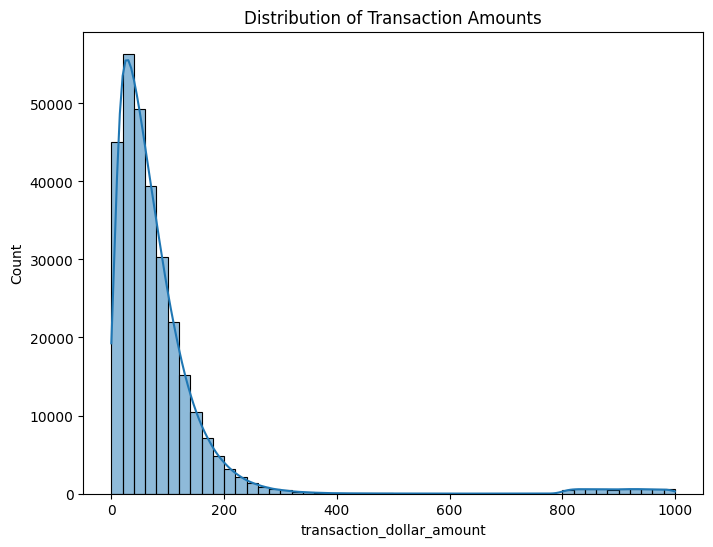

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data['transaction_dollar_amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

From the histogram above we can say that the **"transaction_dollar_amount"** have a right-skewed distribution, which means in this case that the **majority** of transactions made are **less than $\$200$. We can see that very few transactions exceed $\$800$**. This may suggest that if there is ever fraud then perhaps it is hidden in the mass. Or maybe it's the opposite.

<ipython-input-22-dffbd86f8bb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour_only', data=data, palette='cool', order=sorted(data['hour_only'].unique()))


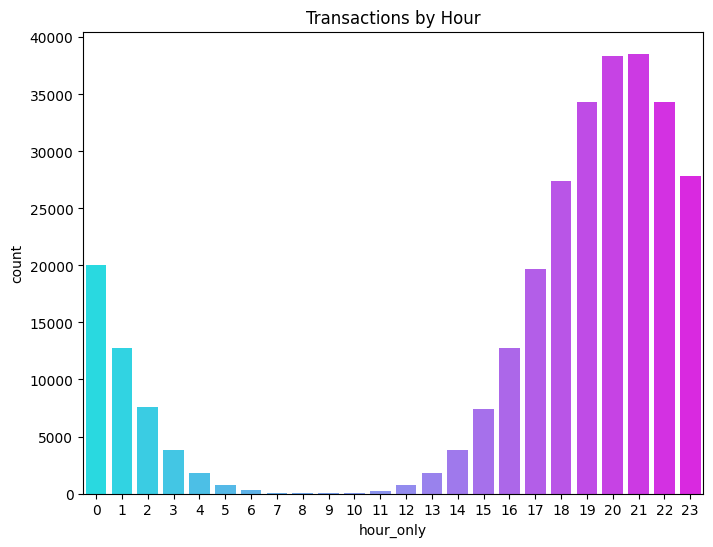

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hour_only', data=data, palette='cool', order=sorted(data['hour_only'].unique()))
plt.title("Transactions by Hour")
plt.show()

From the histogram plot above, the distribution of transaction hours follows a left-skewed pattern, with **the majority of transactions occurring between hours 13 and 24**, featuring evening peaks and a significant decline at night. Additionally, **there are almost no transactions between 6 and 11 a.m.**

<ipython-input-23-17fa6f44eef4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_the_week', data=data, palette='cool', order=days_of_the_week)


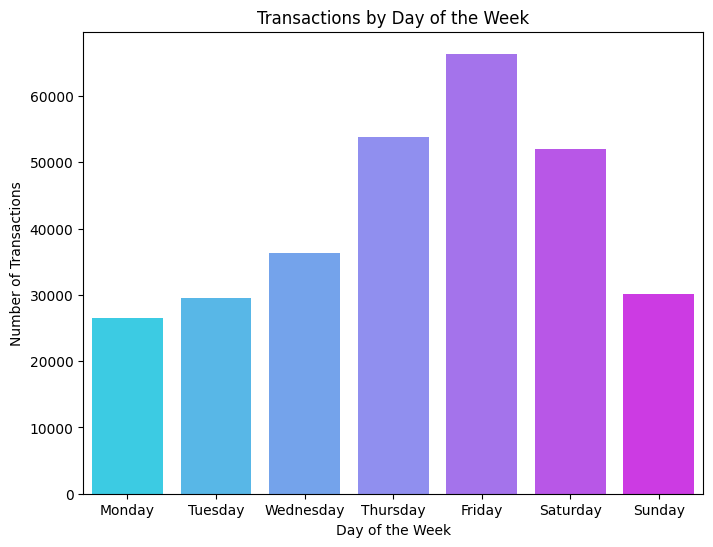

In [23]:
# Define the order of the days of the week
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_the_week', data=data, palette='cool', order=days_of_the_week)
plt.title("Transactions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.show()

The data shows a typical weekly activity pattern, with a high concentration of transactions at the end of the week, **particularly on Friday**, and minimal activity on Sunday.

<ipython-input-24-8dc9450d766f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_only', data=data, palette='cool', order=months_order)


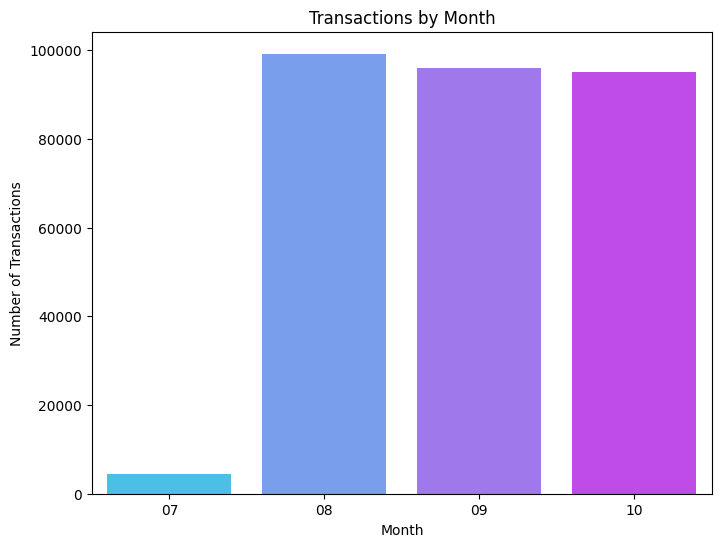

In [24]:
# Define the order of the months
months_order = ['07', '08', '09', '10']

plt.figure(figsize=(8, 6))
sns.countplot(x='month_only', data=data, palette='cool', order=months_order)
plt.title("Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

It is clear that the months of August, September, and November have almost the same number of transactions. As for July, it appears evident that since data collection started toward the end of the month, its transaction count is significantly lower compared to the others.

<ipython-input-25-a4d7d3463c33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state', data=data, palette='cool')


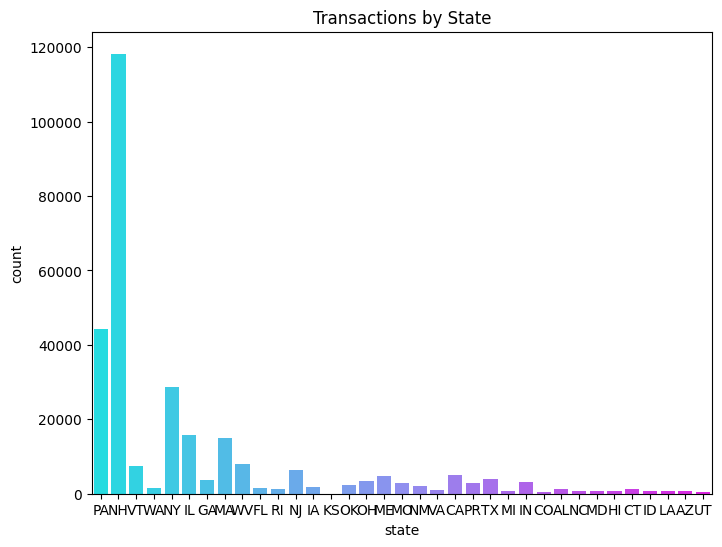

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='state', data=data, palette='cool')
plt.title("Transactions by State")
plt.show()

The three states with the highest number of transactions are:  
* **NH** = New Hampshire  
* **PA** = Pennsylvania  
* **NY** = New York

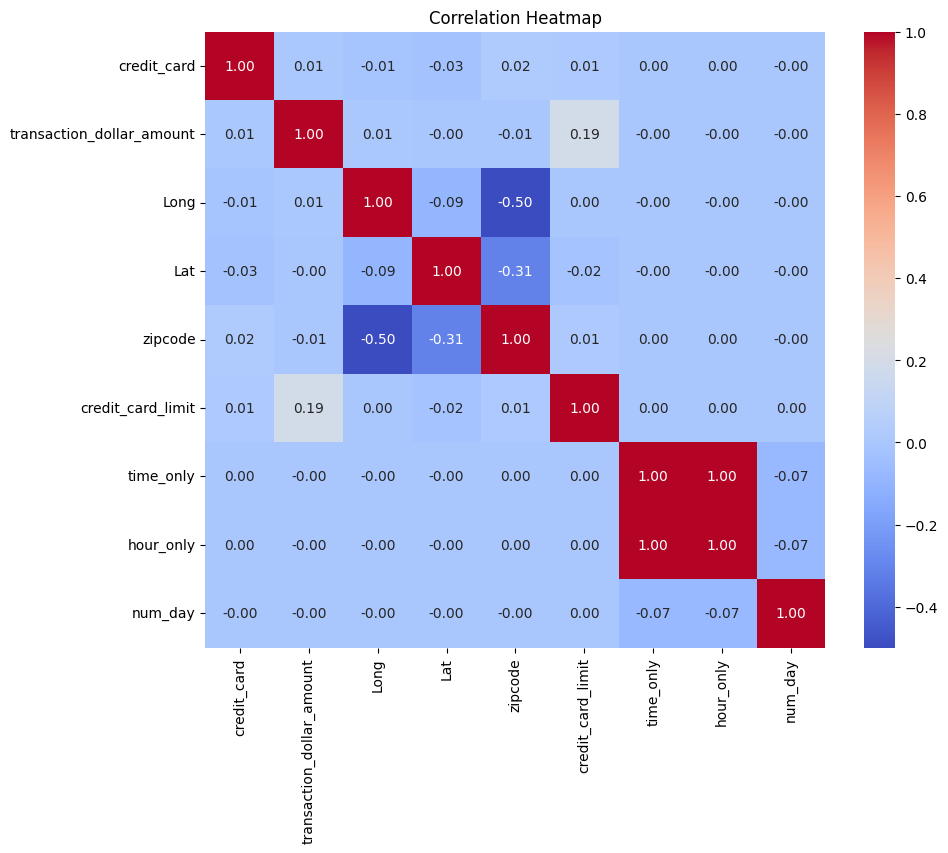

In [26]:
# Heatmap of correlation between numerical features
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['number'])  # Filter only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**We don't really have a strong correlation between our features**. However, there is one that catches our attention, **the highest 19%, that between "transaction_dollar_amount" and "credit_card_limit".**

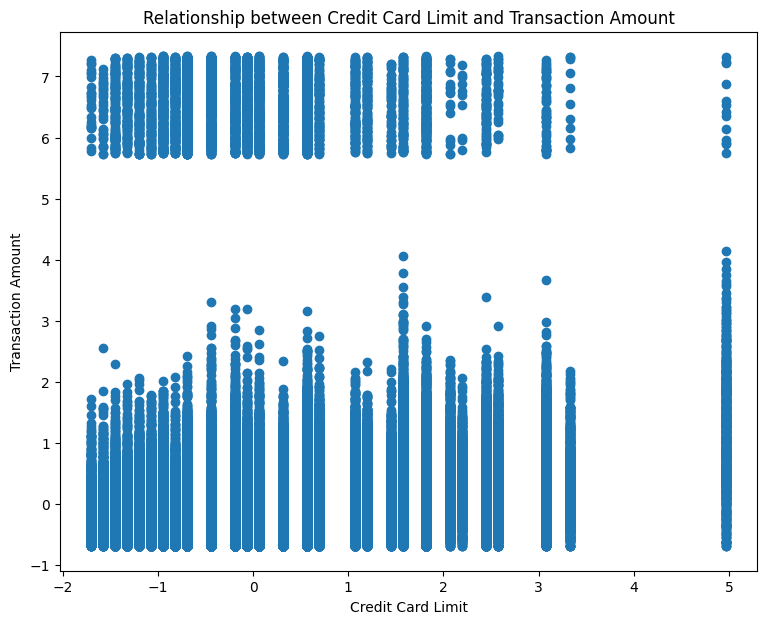

In [27]:
# Calculation of statistics
mean_credit = data_clean['credit_card_limit'].mean()
mean_tx = data_clean['transaction_dollar_amount'].mean()
std_credit = data_clean['credit_card_limit'].std()
std_tx = data_clean['transaction_dollar_amount'].std()

# Column standardization
data_clean['stdz_credit_card_limit'] = (data_clean['credit_card_limit'] - mean_credit) / std_credit
data_clean['stdz_tx_amount'] = (data_clean['transaction_dollar_amount'] - mean_tx) / std_tx

# Graph plot
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

x = data_clean['stdz_credit_card_limit']
y = data_clean['stdz_tx_amount']

plt.scatter(x, y)
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Amount')
plt.title('Relationship between Credit Card Limit and Transaction Amount')
plt.show()

Based on the scatter plot above, it is evident that there are numerous outliers, which obscure the visibility of any clear patterns.

## **IV - Modeling Strategy and Architecture**

**The main objective of this project is to design an advanced fraud detection system based on neural networks, capable of identifying unusual and potentially fraudulent transactions.**

* After analysis, we found that our data evolves over time, indicating the presence of temporal sequences. The most suitable type of neural network for this type of data is the **LSTM (Long Short-Term Memory) network**.

* Our goal is to detect anomalies (frauds), but our data is unlabeled. For this reason, we chose to use **autoencoders**, **unsupervised learning models that learn to reconstruct input data**. They can be used for anomaly detection by identifying transactions that significantly deviate from learned patterns.

**In conclusion, the chosen architecture for our neural network will be an LSTM autoencoder, combining the ability of LSTMs to model temporal sequences with the power of autoencoders to detect anomalies.**

In [28]:
# Select and transform columns
features = ['credit_card', 'transaction_dollar_amount', 'Long', 'Lat', 'city', 'state', 'time_only']

# Encode categorical columns
data_clean['city'] = data_clean['city'].astype('category').cat.codes
data_clean['state'] = data_clean['state'].astype('category').cat.codes

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(data_clean[features])

# Reshape for LSTM model
X_reshaped = X.reshape(X.shape[0], 1, X.shape[1])

In [29]:
# Define the LSTM Autoencoder model
def build_autoencoder(input_shape):
    model = keras.Sequential([
        layers.LSTM(units=64, input_shape=input_shape, return_sequences=True),
        layers.LSTM(units=32, return_sequences=False),
        layers.RepeatVector(input_shape[0]),
        layers.LSTM(units=32, return_sequences=True),
        layers.LSTM(units=64, return_sequences=True),
        layers.TimeDistributed(layers.Dense(input_shape[1]))
    ])
    model.compile(

        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss='mse',
        metrics=['accuracy']

    )
    return model

## **V. Model Training and Validation**

In [30]:
# Prepare the model
input_shape = (X_reshaped.shape[1], X_reshaped.shape[2])
autoencoder = build_autoencoder(input_shape)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = autoencoder.fit(
    X_reshaped, X_reshaped,
    epochs=20, batch_size=256,
    validation_split=0.2, verbose=1,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1732 - loss: 0.2091 - val_accuracy: 0.1778 - val_loss: 0.0581
Epoch 2/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2718 - loss: 0.0344 - val_accuracy: 0.1647 - val_loss: 0.0574
Epoch 3/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2359 - loss: 0.0331 - val_accuracy: 0.1489 - val_loss: 0.0565
Epoch 4/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2198 - loss: 0.0303 - val_accuracy: 0.2556 - val_loss: 0.0365
Epoch 5/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5575 - loss: 0.0175 - val_accuracy: 0.4479 - val_loss: 0.0272
Epoch 6/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7895 - loss: 0.0102 - val_accuracy: 0.7091 - val_loss: 0.0058
Epoch 7/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8595 - loss: 0.0043 - val_accuracy: 0.8257 - val_loss: 0.0033
Epoch 8/20
921/921 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9327 - loss: 0.0027 - val_accuracy: 0

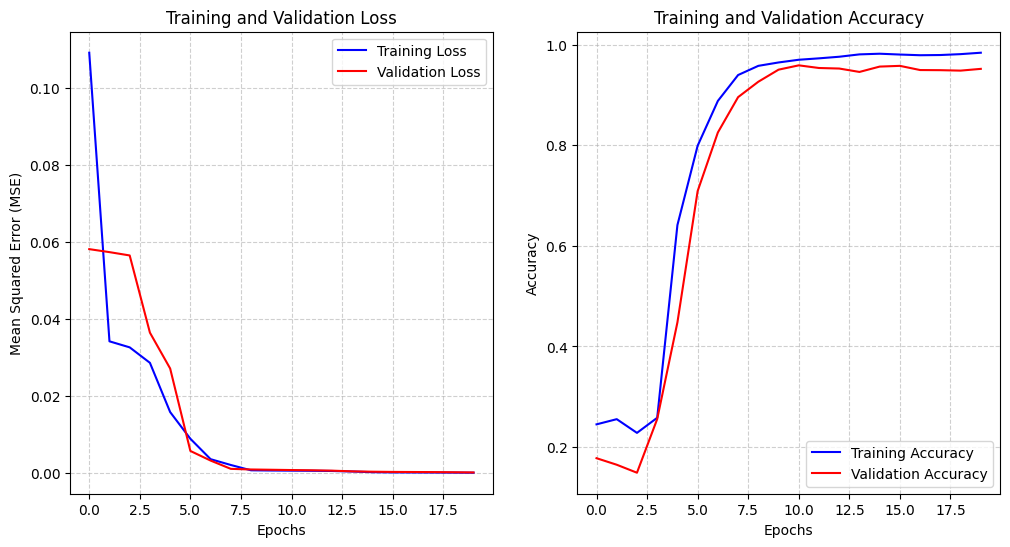

In [31]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

We can clearly observe that over the epochs our model gains in precision.

## **VI. Concluding remarks**

In [32]:
# Calculate reconstruction errors
X_reconstructed = autoencoder.predict(X_reshaped)
reconstruction_errors = np.mean(np.square(X_reshaped - X_reconstructed), axis=(1, 2))

9206/9206 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


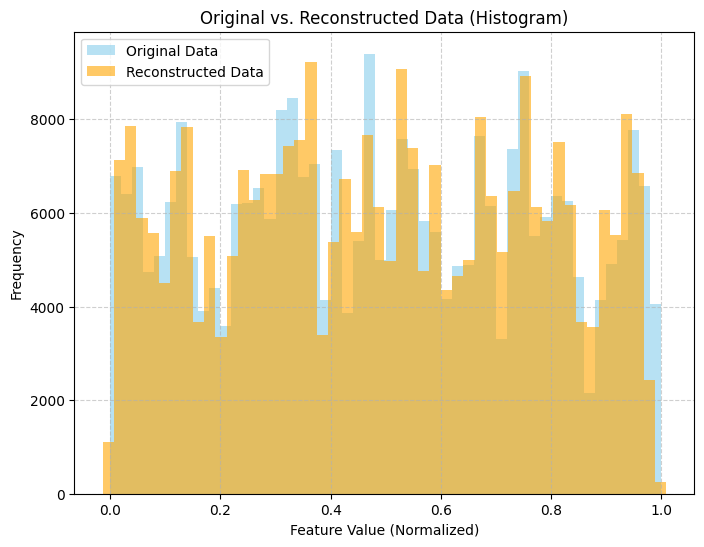

In [33]:
# Plot both original and reconstructed values
plt.figure(figsize=(8, 6))

# Flatten the first feature for both original and reconstructed data
original_values = X_reshaped[:, 0, 0]  # Example: 'transaction_dollar_amount'
reconstructed_values = X_reconstructed[:, 0, 0]

# Plot histograms
plt.hist(original_values, bins=50, color='skyblue', alpha=0.6, label='Original Data')
plt.hist(reconstructed_values, bins=50, color='orange', alpha=0.6, label='Reconstructed Data')

# Customize the plot
plt.title('Original vs. Reconstructed Data (Histogram)')
plt.xlabel('Feature Value (Normalized)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [34]:
# Determine threshold (mean + 2 standard deviations)
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)

# Classify transactions
classified_labels = ["Fraud" if error > threshold else "Normal" for error in reconstruction_errors]

data_clean['Classification'] = classified_labels
result = data_clean.groupby(['Classification']).size().reset_index(name='count')

# Display the result
result.head()

,Classification,count
0,Fraud,4132
1,Normal,290456


This project led me to the design of a **fraud detection system** based on an **LSTM autoencoder model**. This model identified **oseveral suspicious transactions** out of **294,588 transactions**, representing approximately **a little less than $3\%$ of the total**. These results confirm the model's ability to detect **anomalies** in transactional data by learning from normal behavior patterns.

By meeting the **initial objective**, this system provides a **scalable and efficient solution** for fraud detection while remaining **adaptable for future improvements**. Although the model serves as a solid foundation, it is recommended to further validate the results and optimize the **anomaly threshold** for a better balance between **precision** and **recall**.